#**Extreme Overfitting Example**

I'm going to simulate a set of random images and their associated labels. I want to then fit a neural network to the random data. Finally, report how accurate the model is on the training data, and visualize training accuracy across epochs.

Descriptive statistics for the training data:
                  0
count  3.920000e+06
mean   4.997822e-01
std    2.888137e-01
min    2.402447e-07
25%    2.496193e-01
50%    4.996840e-01
75%    7.498099e-01
max    9.999998e-01

The first ten labels are [0. 5. 7. 4. 5. 9. 8. 7. 2. 5.]



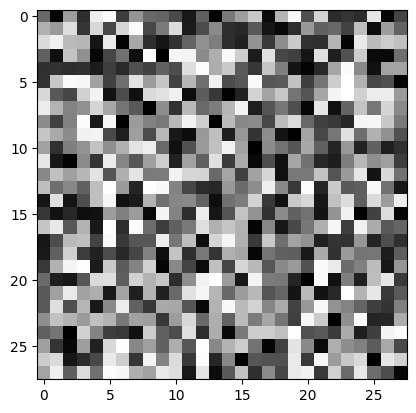

(5000, 784)
(5000, 1)


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im

# Let's synthesize 20,000 images comprised of random pixel values.
train_images_random = np.random.random((5000, 28,28))
df = pd.DataFrame(train_images_random.reshape(-1)) #-1 will drop the last dimension from the tensor and collapse it into the one prior.
print(f'Descriptive statistics for the training data:\n{df.describe()}\n')

# And let's make-up labels for them.
train_labels_random = np.floor(np.random.random(5000)*10)
print(f'The first ten labels are {train_labels_random[:10]}\n')

# Here's what the first picture looks like.
plt.imshow(train_images_random[0],cmap=plt.cm.binary)
plt.show()

# Let's first convert each pixel matrix into a vector.
train_images_random = train_images_random.reshape(5000,28*28)
train_labels_random = train_labels_random.reshape(5000,1)
print(train_images_random.shape)
print(train_labels_random.shape)

Now we will use the simulated data and fit a sequential Keras model that has 512 units in the first layer, with a Relu activation, and then the output layer.

In [3]:
# Setup your model topology here using the Sequential API, as before.
model = keras.Sequential([
      layers.Dense(512,activation="relu"),
      layers.Dense(10, activation="softmax")
])

# Compile your model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

# Fit your model and store the training history in a variable (history) that you can query to plot the training loss, later.
history = model.fit(train_images_random,train_labels_random, batch_size=25,epochs=30)

Epoch 1/30
200/200 [==============================] - 2s 7ms/step - loss: 2.3559 - accuracy: 0.1086
Epoch 2/30
200/200 [==============================] - 1s 5ms/step - loss: 2.3143 - accuracy: 0.1174
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 2.2873 - accuracy: 0.1290
Epoch 4/30
200/200 [==============================] - 1s 5ms/step - loss: 2.2644 - accuracy: 0.1510
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 2.2432 - accuracy: 0.1656
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 2.2206 - accuracy: 0.1818
Epoch 7/30
200/200 [==============================] - 1s 5ms/step - loss: 2.2020 - accuracy: 0.1978
Epoch 8/30
200/200 [==============================] - 1s 5ms/step - loss: 2.1798 - accuracy: 0.2240
Epoch 9/30
200/200 [==============================] - 1s 5ms/step - loss: 2.1572 - accuracy: 0.2354
Epoch 10/30
200/200 [==============================] - 1s 5ms/step - loss: 2.1378 - accuracy: 0.2512

Okay, plot the training loss now...

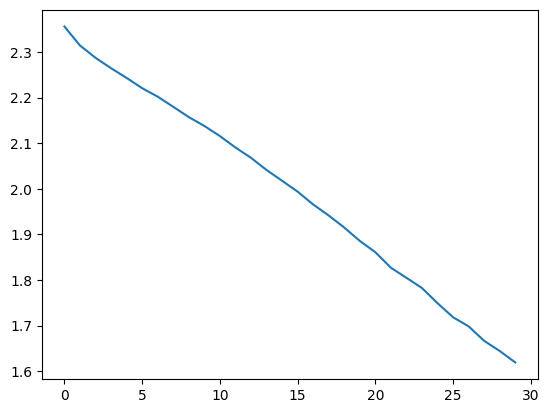

In [4]:
# Call plot commands here.
plt.plot(history.history['loss'])
plt.show()